<a href="https://colab.research.google.com/github/consultantleonardoferreira/Projetos-em-Data-Science/blob/master/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Portfólio de Projetos Data Science**
### Análise Exploratória de Dados: **Case Airbnb - Cidade do Rio de Janeiro**
*by Leonardo Ferreira*

---
<img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/consultantleonardoferreira/eds-enem-2018/master/rio-de-janeiro-809756_1920.jpg?token=AOVROUS7PQX3XPLX4XRRF5S65HPYQ">





#### **Metodologia CRISP - DM**

A metodologia empregada no projeto foi baseada em **CRISP-DM**
(Cross Industry Process Model for Data Mining). A referida metodologia baseia-se em 06 (seis) etapas para construção de projetos na área de Data Science: Entendimento do Negócio, Entendimento dos Dados,  Preparação dos Dados, Construção dos Modelos, Avaliação e Implementação.

#### **Entendimento de Negócios:** Determinando os objetivos de negócios, avaliando a situação (quais problemas a serem resolvidos?), determinando objetivos para o projeto de Data Science (quais objetivos e métricas de sucesso?)

O [Airbnb](https://www.airbnb.com.br/) já é considerado a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. 

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

#### **1. Entendimento dos Dados:** Coletando dados iniciais, descrevendo dados, explorando dados, verificando a qualidade de dados.


##### **1.1 Coletando os dados iniciais**

Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções em *Data Science*.

Dessa forma, foi selecionado o arquivo (listings.csv) - Summary information and metrics for listings in Rio de Janeiro (good for visualisations).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")

##### **1.2 Descrevendo os dados**

Nessa etapa os dados são descritos com objetivo de conhecermos seu formato, os tipos de variáveis, bem como aspectos gerais úteis ao entendimento geral do problema.



In [19]:
df.shape

(35870, 16)

Em uma análise inicial percebe-se que o dataset apresenta um total de 35870 linhas, entradas ou observações, bem como um total de 16 colunas, variáveis ou features. Sendo interessante estabelecermos um dicionário com o significado das variáveis (metadados do dataset).

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Adicionalmente, é bastante interessante verificarmos os tipos das variáveis que integram no dataset: interias, float, objetos. Tal análise poderá indicar na fase de limpeza de dados a necessidade de transformações para melhor aplicação de técnicas de Data Science.

In [20]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

E por fim, nesse etapa, é interessante vermos a estrutura do dataset com suas linhas e colunas dispostos em forma tabular (Data Frame).

In [0]:
df.head()
df.tail()

##### **1.3 Qualidade dos dados**

Agora que já conhecemos a estrutura de nossos dados passamos para etapa de identificação da qualidade de nossos dados, com especial atenção para identificação de valores faltantes, presença de outliers, dentre outras questões. 

**Quanto à questão de dados faltantes, em uma breve verificação podemos identificar que:**

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

**Quanto à questão da presença de outliers, em uma rápida análise podemos identificar que:** 

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

**Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

* A variável `price` possui 75% do valor abaixo de 632, porém seu valor máximo é 131727.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

In [22]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

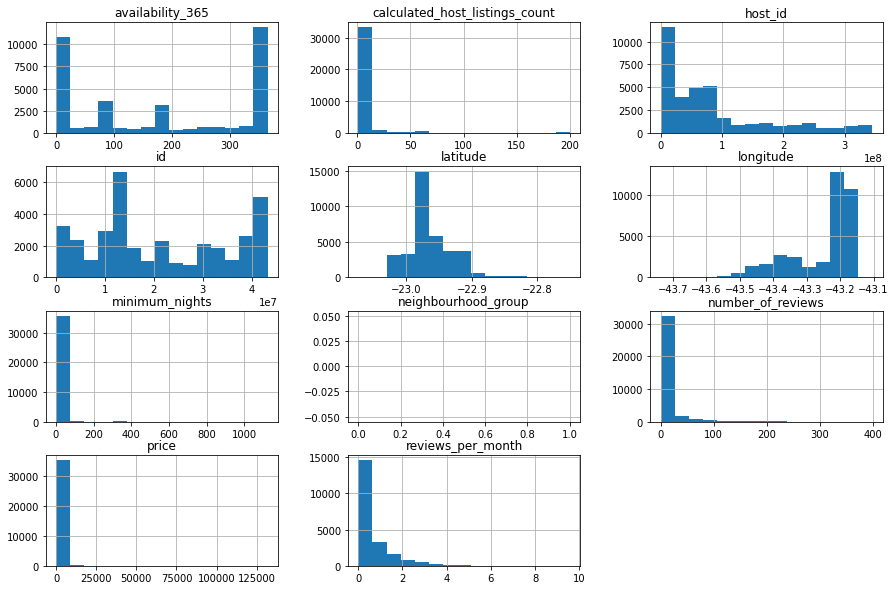

In [23]:
df.hist(bins=15, figsize=(15,10));

In [24]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


#### **Preparação de Dados:** Selecionando os dados, limpando os dados, construindo novos dados, integrando dados e formatando dados.

#### **Modelando**: Selecionando técnicas de modelagem em Data Science, gerando um design de teste, construindo modelos:machine learning, deep learning, inteligência artificaial, avaliando os modelos.

#### **Avaliação:** Avaliando os resultados e processo de revisão.

#### **Implementação:** Planejamento da implementação, planejamento do monitoramento e a manutenção da solução, produzir um relatório final.

### **Referências**

P. Chapman, J. Clinton, R. Kerber, T. Khabaza, T. Reinartz, C. Shearer,
and R. Wirth, “Crisp–dm 1.0 step-by-step data mining guide,” 2000.